### Common Voice
##### 500 hours of speech recordings, with speaker demographics

*  1. Purpose of this notebook is to explore demographics data and filter audio files 
*  2. Convert MP3  audio files to to wav 

##### Author - James, Aalok, Reshma


The corpus is split into several parts for your convenience. 
The subsets with “valid” in their name are audio clips that have had at least 2 people listen to them, and the majority of those listeners say the audio matches the text. 
The subsets with “invalid” in their name are clips that have had at least 2 listeners, and the majority say the audio does not match the clip.
All other clips, ie. those with fewer than 2 votes, or those that have equal valid and invalid votes, have “other” in their name.

* The “valid” and “other” subsets are further divided into 3 groups:
* dev - for development and experimentation
* train - for use in speech recognition training
* test - for testing word error rate

Each row of a csv file represents a single audio clip, and contains the following information:

* filename - relative path of the audio file
* text - supposed transcription of the audio
* up_votes - number of people who said audio matches the text
* down_votes - number of people who said audio does not match text
* age - age of the speaker, if the speaker reported it
* gender - gender of the speaker, if the speaker reported it
* accent - accent of the speaker, if the speaker reported it


* Age details
    * teens: '< 19'
    * twenties: '19 - 29'
    * thirties: '30 - 39'
    * fourties: '40 - 49'
    * fifties: '50 - 59'
    * sixties: '60 - 69'
    * seventies: '70 - 79'
    * eighties: '80 - 89'
    * nineties: '> 89'
    
    
* Gender details
    * male
    * female
    * other


* Accent details
    * us: 'United States English'
    * australia: 'Australian English'
    * england: 'England English'
    * canada: 'Canadian English'
    * philippines: 'Filipino'
    * hongkong: 'Hong Kong English'
    * indian: 'India and South Asia (India, Pakistan, Sri Lanka)'
    * ireland: 'Irish English'
    * malaysia: 'Malaysian English'
    * newzealand: 'New Zealand English'
    * scotland: 'Scottish English'
    * singapore: 'Singaporean English'
    * southatlandtic: 'South Atlantic (Falkland Islands, Saint Helena)'
    * african: 'Southern African (South Africa, Zimbabwe, Namibia)'
    * wales: 'Welsh English'
    * bermuda: 'West Indies and Bermuda (Bahamas, Bermuda, Jamaica, Trinidad)'

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

In [2]:
#mozilla database files - 38 GB

valid_ = pd.read_csv('mozilla/validated.tsv', sep='\t')
dev_   = pd.read_csv('mozilla/dev.tsv', sep='\t')
train_ = pd.read_csv('mozilla/train.tsv', sep='\t')
test_  = pd.read_csv('mozilla/test.tsv', sep='\t')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Dataset structure

valid_ dataset includes all audio files from dev_, train_ and test_

### Data cleaning
    1. Remove audio files where age, gender and accent are null
    2. Remove audio files where downvotes are more than 0
    3. Remove audio files where upvotes is less than 2

In [3]:
def data_cleaning(df, name):
    print (name+" file before cleaning:", df.shape)
    df = df[pd.notnull(df['age'])]
    df = df[pd.notnull(df['gender'])]
    df = df[pd.notnull(df['accent'])]
    df = df[df['down_votes']==0]
    df = df[df['up_votes']>=2]
    print (name+ " clean file after cleaning:", df.shape)
    return df

def get_plot(df):
    fig, ax = plt.subplots(ncols=3, figsize=(10,4))
    df.accent.value_counts().plot.bar(ax=ax[0])
    df.age.value_counts().plot.bar(ax=ax[1])
    df.gender.value_counts().plot.bar(ax=ax[2])
    fig.tight_layout()

dev_ file before cleaning: (15531, 8)
dev_ clean file after cleaning: (1633, 8)


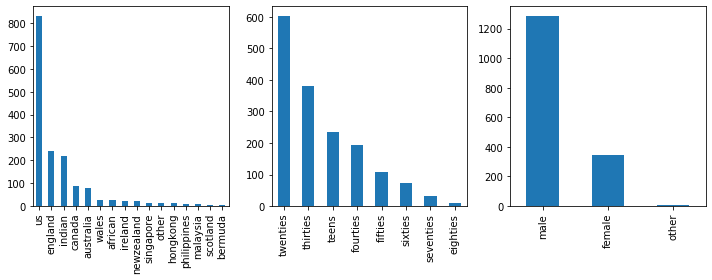

In [4]:
dev_clean = data_cleaning(dev_, 'dev_')
get_plot(dev_clean)

train_ file before cleaning: (232975, 8)
train_ clean file after cleaning: (114304, 8)


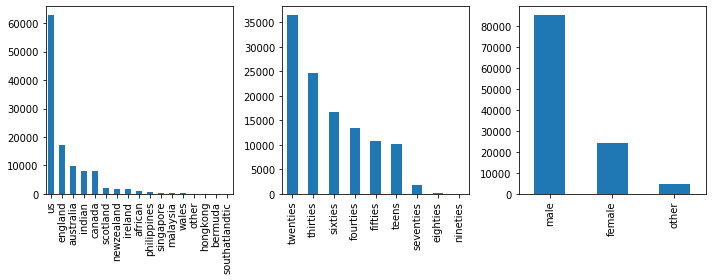

In [5]:
train_clean = data_cleaning(train_, 'train_')
get_plot(train_clean)

In [6]:
train_clean['accent'].unique()

array(['england', 'us', 'wales', 'australia', 'other', 'indian',
       'scotland', 'canada', 'philippines', 'african', 'ireland',
       'malaysia', 'hongkong', 'newzealand', 'singapore', 'bermuda',
       'southatlandtic'], dtype=object)

test_ file before cleaning: (15531, 8)
test_ clean file after cleaning: (995, 8)


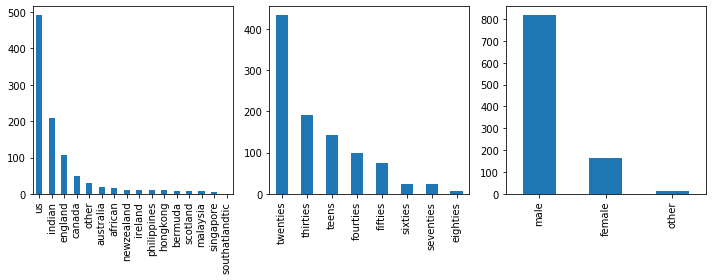

In [7]:
test_clean = data_cleaning(test_, 'test_')
get_plot(test_clean)

In [8]:
#kaggle dataset - 13 GB
cv_valid_train = pd.read_csv('kaggle/cv-valid-train.csv')
cv_valid_test  = pd.read_csv('kaggle/cv-valid-test.csv')
cv_valid_dev   = pd.read_csv('kaggle/cv-valid-dev.csv')

cv_valid_dev file before cleaning: (4076, 8)
cv_valid_dev clean file after cleaning: (626, 8)


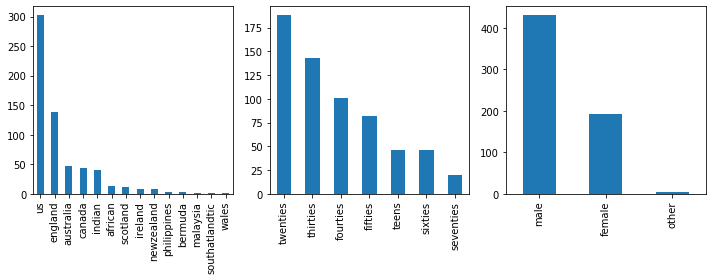

In [9]:
cv_valid_dev_clean = data_cleaning(cv_valid_dev, 'cv_valid_dev')
get_plot(cv_valid_dev_clean)

cv_valid_train file before cleaning: (195776, 8)
cv_valid_train clean file after cleaning: (30955, 8)


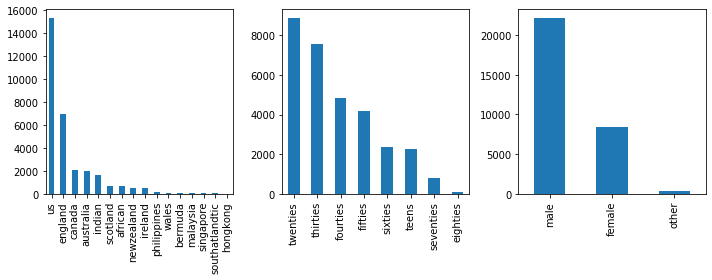

In [10]:
cv_valid_train_clean = data_cleaning(cv_valid_train, 'cv_valid_train')
get_plot(cv_valid_train_clean)

cv_valid_test file before cleaning: (3995, 8)
cv_valid_test clean file after cleaning: (623, 8)


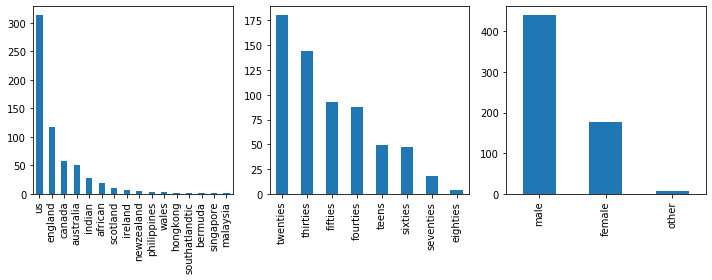

In [11]:
cv_valid_test_clean = data_cleaning(cv_valid_test, 'cv_valid_test')
get_plot(cv_valid_test_clean)

### Prepare dataset for study

1. Only valid train dataset from Kaggle
2. filter non us accent audios and sample it further to get enough female samples
3. remove 'other' from gender

In [12]:
sel_train_clean     = train_clean[train_clean['accent']!='us']
sel_train_clean     = sel_train_clean[sel_train_clean['accent']!='other']
sel_train_clean     = sel_train_clean[sel_train_clean['gender'] != 'other']
rare_accent = ['scotland', 'philippines', 'african', 'ireland','malaysia', 'hongkong', 'newzealand', 'singapore', 'bermuda', 'southatlandtic']
sel_train_clean_rare  = sel_train_clean[sel_train_clean['accent'].isin(rare_accent)]
sel_train_clean_rest  = sel_train_clean[~sel_train_clean['accent'].isin(rare_accent)]
sel_train_clean_fm  = sel_train_clean_rest[sel_train_clean_rest['gender'] == 'female']
sel_train_clean_ma  = sel_train_clean_rest[sel_train_clean_rest['gender'] != 'female']
train_X, test_X     = train_test_split(sel_train_clean_ma ,test_size=0.2, random_state=99)
mozilla_train       = pd.concat([sel_train_clean_fm, test_X, sel_train_clean_rare], axis=0)
mozilla_train.drop('client_id', axis=1, inplace=True)
mozilla_train.rename(columns={'path':'filename', 'sentence':'text'}, inplace=True)
mozilla_train.shape

(21894, 7)

In [13]:
# cv_valid_train_clean.drop('duration', axis=1, inplace=True)
cv_valid_train_clean = cv_valid_train_clean[cv_valid_train_clean['gender'] != 'other']
cv_valid_train_clean = cv_valid_train_clean[cv_valid_train_clean['accent'] != 'other']
cv_valid_train_clean['filename'] = cv_valid_train_clean['filename'].apply(lambda x : x.replace('cv-valid-train/', ''))

In [14]:
cv_train_all = pd.concat([cv_valid_train_clean,mozilla_train], axis=0, ignore_index=True)

In [15]:
cv_train_all.shape

(52433, 8)

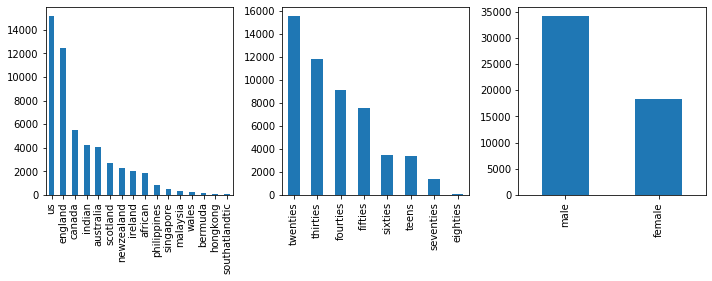

In [16]:
get_plot(cv_train_all)

In [17]:
cv_train_all.to_csv('FilteredMP3.csv', index=False)